# Übungszettel 11: SVM und Backpropagation (Musterlösung)

## Maschinelles Lernen - WiSe 23/24

### Abgabe 24.01.2024, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- Es wird pro Übungszettel nur eine Aufgabe bewertet, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen. Bei Nichtbefolgung dieser Vorgabe können Punkte abgezogen werden.

---
## Aufgabe 1: SVM

In den folgenden Aufgabenteilen soll mit Hilfe der Stützvektormethode (SVM) die durch die Geradengleichung $w_1x_1 + w_2x_2 = t$ mit maximalem Rand definierte lineare Diskriminanzfunktion von Hand berechnet werden.

Gegeben seien die folgenden 2-dimensionalen Datenpunkte $\mathbf{X}$ mit Klasse $\mathbf{y}$:

|$x_1$|$x_2$|$y$|
|:----|:----|:--|
|  1  |  3  | -1|
| −1  |  3  | -1|
| −1  | −1  | +1|

a) Stellen Sie das duale Optimierungsproblem für die gegebenen Punkte auf.

Duales Problem mit Lagrange-Multiplikatoren:

$\max_\alpha \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)^T} x^{(j)} $

$s. t. \alpha_i \geq 0$ $\forall i = 1, \dots, m$ und $0 = \sum_{i=1}^m \alpha_i y^{(i)}$

Einsetzen der Trainingsbeispiele ergibt:

$\max_\alpha \sum_{i=1}^m \alpha_i - \frac{1}{2} \left ( \alpha_1 \alpha_1 \begin{pmatrix} 1 & 3 \end{pmatrix} \begin{pmatrix} 1\\3 \end{pmatrix} + \dots + \alpha_3 \alpha_3 \begin{pmatrix} -1 & -1 \end{pmatrix} \begin{pmatrix} -1\\-1 \end{pmatrix} \right ) $

$= \max_\alpha \alpha_1 + \alpha_2 + \alpha_3 - 5 \alpha_1^2 - 5 \alpha_2^2 - \alpha_3^2 - 8 \alpha_1 \alpha_2 - 4 \alpha_1 \alpha_3 - 2 \alpha_2 \alpha_3$

Und für die Nebenbedingung:

$0 = - \alpha_1 - \alpha_2 + \alpha_3$

b) In der Praxis werden solche dualen Optimierungsprobleme mit quadratischer Programmierung gelöst. Hier soll es aber von Hand gelöst werden. Gehen Sie wie folgt vor:

* Nutzen Sie die Nebenbedingungen, um $\alpha_3$ zu eliminieren
* Berechnen Sie $\alpha_1$, $\alpha_2$ und schließlich $\alpha_3$
* Berechnen Sie $\mathbf{w}$
* Bestimmen Sie die Breite des maximalen Randes (maximum margin)
* Geben Sie die Stützvektoren (support vectors) an
* Berechnen Sie $t$

#### Berechnen von $\alpha_1, \alpha_2, \alpha_3$ : 
$0 = - \alpha_1 - \alpha_2 + \alpha_3 \\
\Rightarrow \alpha_3 = \alpha_1 + \alpha_2$
Somit kann die Nebenbedingung in das Optimierungsproblem eingesetzt werden:

$max_\alpha \alpha_1 + \alpha_2 + \alpha_1 + \alpha_2 - 5 \alpha_1^2 - 5 \alpha_2^2 - (\alpha_1 + \alpha_2)^2 - 8 \alpha_1 \alpha_2 - 4 \alpha_1 (\alpha_1 + \alpha_2) - 2 \alpha_2 (\alpha_1 + \alpha_2) \\
= max_\alpha 2 \alpha_1 + 2 \alpha_2 - 10 \alpha_1^2 - 8 \alpha_2^2 - 16 \alpha_1 \alpha_2 \\
= max_\alpha \alpha_1 + \alpha_2 - 5 \alpha_1^2 - 4 \alpha_2^2 - 8 \alpha_1 \alpha_2 $

Wir berechnen die partiellen Ableitungen nach $\alpha_1$ und $\alpha_2$ und setzen diese = 0 um das Maximum zu finden:

$0=1-10\alpha_1-8\alpha_2$

$0=1-8\alpha_2-8\alpha_1$

$\Rightarrow max = \frac{1}{16}$ bei $\alpha_1 = 0$ und $\alpha_2 = \frac{1}{8}$

$\Rightarrow \alpha_3 = \frac{1}{8} $

####  Gewichtsvektor $\mathbf{w}$ berechnen:
$\mathbf{w} = \sum_{i=1}^3 \alpha_i y^{(i)} x^{(i)} = \frac{1}{8} y^{(2)} x^{(2)} + \frac{1}{8} y^{(3)} x^{(3)} \\ 
= \frac{1}{8} \left ( \begin{pmatrix}-1\\-1\end{pmatrix} - \begin{pmatrix}-1\\3\end{pmatrix} \right )
= \begin{pmatrix} 0 \\ - \frac{1}{2} \end{pmatrix}$

#### Maximum Margin bestimmen:

Länge von $\mathbf{w}$:

$||\mathbf{w}|| = \sqrt{w_1^2 + w_2^2} = \sqrt{(- \frac{1}{2})^2} = \frac{1}{2}$

Die Margin ist also $\frac{1}{||\mathbf{w}||} = 2$

#### Stützvektoren bestimmen:

Supportvektoren sind alle Eingabevektoren $x^{(i)}$, für die gilt $\alpha_i \neq 0$, also $x^{(2)}$ und $x^{(3)}$.

#### $t$ bestimmen:

Da wir einen Hard Margin haben, können wir nun anhand eines Supportvektors auch $b$ bzw. $t$ bestimmen:

$y^{(2)} (w^T x^{(2)}-t) = 1$

$\Rightarrow - \begin{pmatrix}0&-0.5\end{pmatrix} \begin{pmatrix}-1\\3\end{pmatrix} +t = 1$

$\Rightarrow 1.5 +t = 1 \Rightarrow t = -0.5$

#### Diskriminanzfunktion:

Mit den Parametern ergibt sich eine Gerade, die durch $y=1$ verläuft. Die Diskriminanzfunktion ist also:

$K(x) =\textrm{sgn} \left ( \sum_{i=1}^m \alpha_i y^{(i)} x^{(i)^T} x -t \right ) \\
=\textrm{sgn} \left ( y^{(2)} x^{(2)^T} x + y^{(3)} x^{(3)^T} x + 0.5 \right )  \\
=\textrm{sgn} \left ( \begin{pmatrix} -1 & -1 \end{pmatrix} x - \begin{pmatrix} -1 & 3 \end{pmatrix} x +  0.5 \right )$

c) Wenden Sie nun die in b) berechnete Diskriminanzfunktion auf den Punkt $ \mathbf{x}=\begin{bmatrix} 3 \\ 0 \\ \end{bmatrix} $ an.

$K(\begin{pmatrix} 3 \\ 0 \end{pmatrix}) = \textrm{sgn} \left ( \begin{pmatrix} -1 & -1 \end{pmatrix} \begin{pmatrix} 3 \\ 0 \end{pmatrix} - \begin{pmatrix} -1 & 3 \end{pmatrix} \begin{pmatrix} 3 \\ 0 \end{pmatrix} +  0.5 \right ) \\
= \textrm{sgn} \left ( -3 + 3 +  0.5 \right ) \\
= \textrm{sgn} \left ( 0.5 \right ) \\
= 1 $

d) Plotten Sie alle 4 Punkte und die Trennebene.

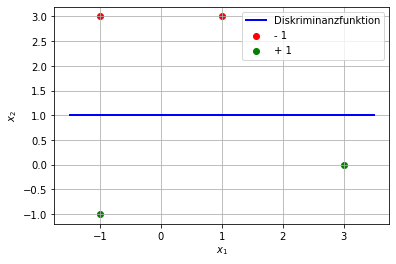

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [1, -1]
x2 = [-1, 3]
y1 = [3, 3]
y2 = [-1, 0]
plt.scatter(x1, y1, color = "r", label="- 1")
plt.scatter(x2, y2, color = "g", label="+ 1")
x_range = np.linspace(-1.5, 3.5, 10)
plt.plot(x_range, np.ones(len(x_range)), color="b", linewidth = 2, label="Diskriminanzfunktion")
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.show()

e) Nehmen Sie an, dass sich im Datensatz ein weiterer Punkt $ \mathbf{x}=\begin{bmatrix} 0 \\ 3 \\ \end{bmatrix} $ mit Klasse $ \mathbf{y}=+1 $ befindet. Was ist das Problem? Wie kann es gelöst werden?

Für $\mathbf{x}=\begin{bmatrix} 0 \\ 3 \\ \end{bmatrix}$ gilt:

$ \textrm{sgn}
\left(h\left(
\begin{pmatrix}
0\\
3\\
\end{pmatrix}\right)\right) = -1
$.

Dieser Punkt wird also falsch klassifiziert.

Die Klassen sind dann nicht mehr im 2-dimensionalen Raum linear trennbar.

Das Problem kann gelöst werden, indem die Daten in eine höhere Dimension transformiert werden, in der sie wieder linear trennbar sind. In diesem Beispiel könnten die Klassen getrennt werden, indem man sie auf einer Z-Achse zueinander verschiebt). Alternativ kann auch ein Kernel-Trick angewendet werden, um die Hyperebene nur implizit in einem höherdimensionalen Raum zu berechnen, ohne die Daten explizit zu transformieren.

---
## Aufgabe 2: Kernel-Trick 

In der vorigen Aufgabe wurden SVMs mit linearem Kernel $k_{linear}(x,y) = \langle  x,y \rangle = x^Ty $ betrachtet. Betrachten Sie nun einen polynomialen Kernel $ k_{q} = (x^Ty)^2 $. Dabei sind $x, y \in \mathbb{R}^2$

a) Was ist der Vorteil einer Kernelfunktion gegenüber dem Skalarprodukt im höherdimensionalen Raum?

Die Berechnung ist günstiger mit der Kernelfunktion als das Skalarprodukt im höherimensionalen Raum zu berechnen (siehe c)

b) Leiten Sie von Kernel $ k_{q} = (x^Ty)^2 $ ausgehend die Transformationsfunktion $\phi(x)$ her 
und geben Sie $ \langle  \phi(x),\phi(y) \rangle $ an. 

Mit $x=(x_1,x_2),y=(y_1,y_2)\in \mathbb{R}^2$ gilt:

\begin{align}
K(x,y) &= (x_1y_1 + x_2y_2)^2\\
&= (x_1y_1)^2 + 2x_1y_1x_2y_2 + (x_2y_2)^2\\
&= x_1^2 y_1^2 + \sqrt{2}x_1x_2\sqrt{2}y_1y_2 + x_2^2y_2^2\\
&= \langle\begin{pmatrix}
x_1^2\\
\sqrt{2}x_1x_2\\
x_2^2
\end{pmatrix},
\begin{pmatrix}
y_1^2\\
\sqrt{2}y_1y_2\\
y_2^2
\end{pmatrix}\rangle 
\end{align}

Also ist $\phi(x) = \begin{pmatrix}
x_1^2\\
\sqrt{2}x_1x_2\\
x_2^2
\end{pmatrix}$


c) Zählen Sie die Anzahl der Multiplikationen und Additionen jeweils für die Berechnung von
* $(x^Ty)^2$
* $\phi(x)^T\phi(y)$,
wobei die Transformationsfunktion $\phi$ aus b) benutzt werden soll.

* $(x^Ty)^2$:

  Mit $z = x_1y_1 + x_2y_2$ (2 Multiplikationen, 1 Addition) und $z^2$ $\Rightarrow$ 3 Multiplikationen, 1 Addition


* $\phi(x)^T\phi(y)$:

  Mit $ x_1^2y_1^2 + \sqrt{2}x_1x_2\sqrt{2}y_1y_2 + x_2^2y_2^2 $ (11 Multiplikationen, 2 Additionen)
  

---
## **Aufgabe 3: Backpropagation (bewertet: 0,5+4,5 Punkte)**

Der folgende Graph repräsentiert ein einzelnes Neuron eines neuronalen Netzes mit 3-dimensionalem Eingabevektor $x$, lernbaren Gewichten $w$ und **tanh** Aktivierung. Die Ausgabe eines solchen Neurons ist $ \mathrm{tanh}\left(\sum_{i}w_ix_i + b\right) $. Im Graph ist die Berechung in kleinere Operationen aufgeteilt um die Anwendung des Backpropagation-Algorithmus zu verdeutlichen.

![image](tanh_graph.png)

a) Führen Sie den Forward-Pass durch. 

Berechnen Sie also die Werte $
f_1, f_2, f_3, f_4, f_5$ und $f_t.
$

$$ \begin{align} 
f_1&=x_0*w_0+x_1*w_1+x_2*w_2+b \\
   &=2*(-0.75)+3*2+(-1)*(3)-2=-0.5\\
f_2&=2*f_1=-1   \\  
f_3&=e^{f_2}=0.36787944\\
f_4&=f_3+1=1.36787944\\
f_5&=2/f_4=1.4621171\\
f_t&=1-f_5=-0.4621171\\
\end{align} $$

b) Berechnen Sie den Gradienten für alle Knoten im Graph mittels Backpropagation. 

Berechnen Sie also die Werte $
\frac{df_t}{dw_0},
\frac{df_t}{dw_1},
\frac{df_t}{dw_2},
\frac{df_t}{dx_0},
\frac{df_t}{dx_1},
\frac{df_t}{dx_2},
\frac{df_t}{db},
\frac{df_t}{df_1},
\frac{df_t}{df_2},
\frac{df_t}{df_3},
\frac{df_t}{df_4},
\frac{df_t}{df_5},$ und $ \frac{df_t}{df_t}.
$

$$ \begin{align}    
\dfrac{df_t}{df_t}&=1 \\ \\
\dfrac{df_t}{df_5}&=\dfrac{df_t}{df_t}*\dfrac{df_t}{df_5}=1*(-1)=-1\\ \\
\dfrac{df_t}{df_4}&=\dfrac{df_t}{df_5}*\dfrac{df_5}{df_4}=(-1)*(-2/(f_4)^2)= 2/1.36787944^2=1.068893290\\ \\
\dfrac{df_t}{df_3}&=\dfrac{df_t}{df_4}*\dfrac{df_4}{df_3}=1.068893290 * 1 = 1.068893290\\ \\
\dfrac{df_t}{df_2}&=1.068893290 * e^{f_2}= 1.068893290 * e^{-1}=0.393223866  \\ \\
\dfrac{df_t}{df_1}&=0.393223866*2=0.7864477\\ \\
\dfrac{df_t}{df_b}&=0.7864477*1 = 0.7864477\\ \\
\dfrac{df_t}{df_{x_2}}&= 0.7864477*w_2 = 0.7864477*(-1)= -0.7864477\\ \\
\dfrac{df_t}{df_{w_2}}&=0.7864477*x_2 = 0.7864477*3 = 2.3593432 \\ \\
\dfrac{df_t}{df_{x_1}}&= 0.7864477*w_1 = 0.7864477*3  =  2.3593432\\ \\
\dfrac{df_t}{df_{w_1}}&= 0.7864477*x_1 = 0.7864477*2= 1.572895466\\ \\
\dfrac{df_t}{df_{x_0}}&= 0.7864477*w_0 = 0.7864477*2 =1.572895466\\ \\
\dfrac{df_t}{df_{w_0}}&= 0.7864477*x_0 =0.7864477*(-0.75) =-0.5898357997
\end{align}$$